In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
# import seaborn as sns 

In [25]:
# plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 500 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [27]:
df = pd.read_csv(r"Bond-VN.csv", index_col= 0,parse_dates=True)

y = df.GGVF5Y
x = df[['GGVF1Y','CPI','FER','Baserate','FIR', 'Stockreturn','Fiscal', 'Pubdebt', 'CurrentAcc']]

In [28]:
n_state = 50
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state=n_state) 

In [29]:
y_test_1 = y_test

In [30]:
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

x_train = sc_X.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)
x_test = sc_X.fit_transform(x_test)
y_test = sc_y.fit_transform(y_test)

# Decision Tree Regressor

In [32]:
decision_tree = DecisionTreeRegressor(random_state=n_state)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=50)

In [33]:
pred_decision_tree = decision_tree.predict(x_test)
pred_decision_tree = sc_y.inverse_transform(pred_decision_tree)
y_test_i = sc_y.inverse_transform(y_test)


In [34]:
adj_pred_decision_tree = []
for p in pred_decision_tree:
    adj_pred_decision_tree.append(p)

In [35]:
result_decision_tree = pd.DataFrame({'Real': y_test_1, 'Prediction': adj_pred_decision_tree})
result_decision_tree.sort_index(inplace=True)
result_decision_tree.head(7)

,Real,Prediction
Time,,
2007-07-01,0.07559,0.072925
2007-11-01,0.08617,0.079349
2008-03-01,0.08730,0.088420
2008-06-01,0.20333,0.177977
2008-08-01,0.16475,0.226887
2009-05-01,0.09178,0.094757
2009-09-01,0.10028,0.103252


In [36]:
result_decision_tree.to_excel('Decision_tree_5y.xlsx')

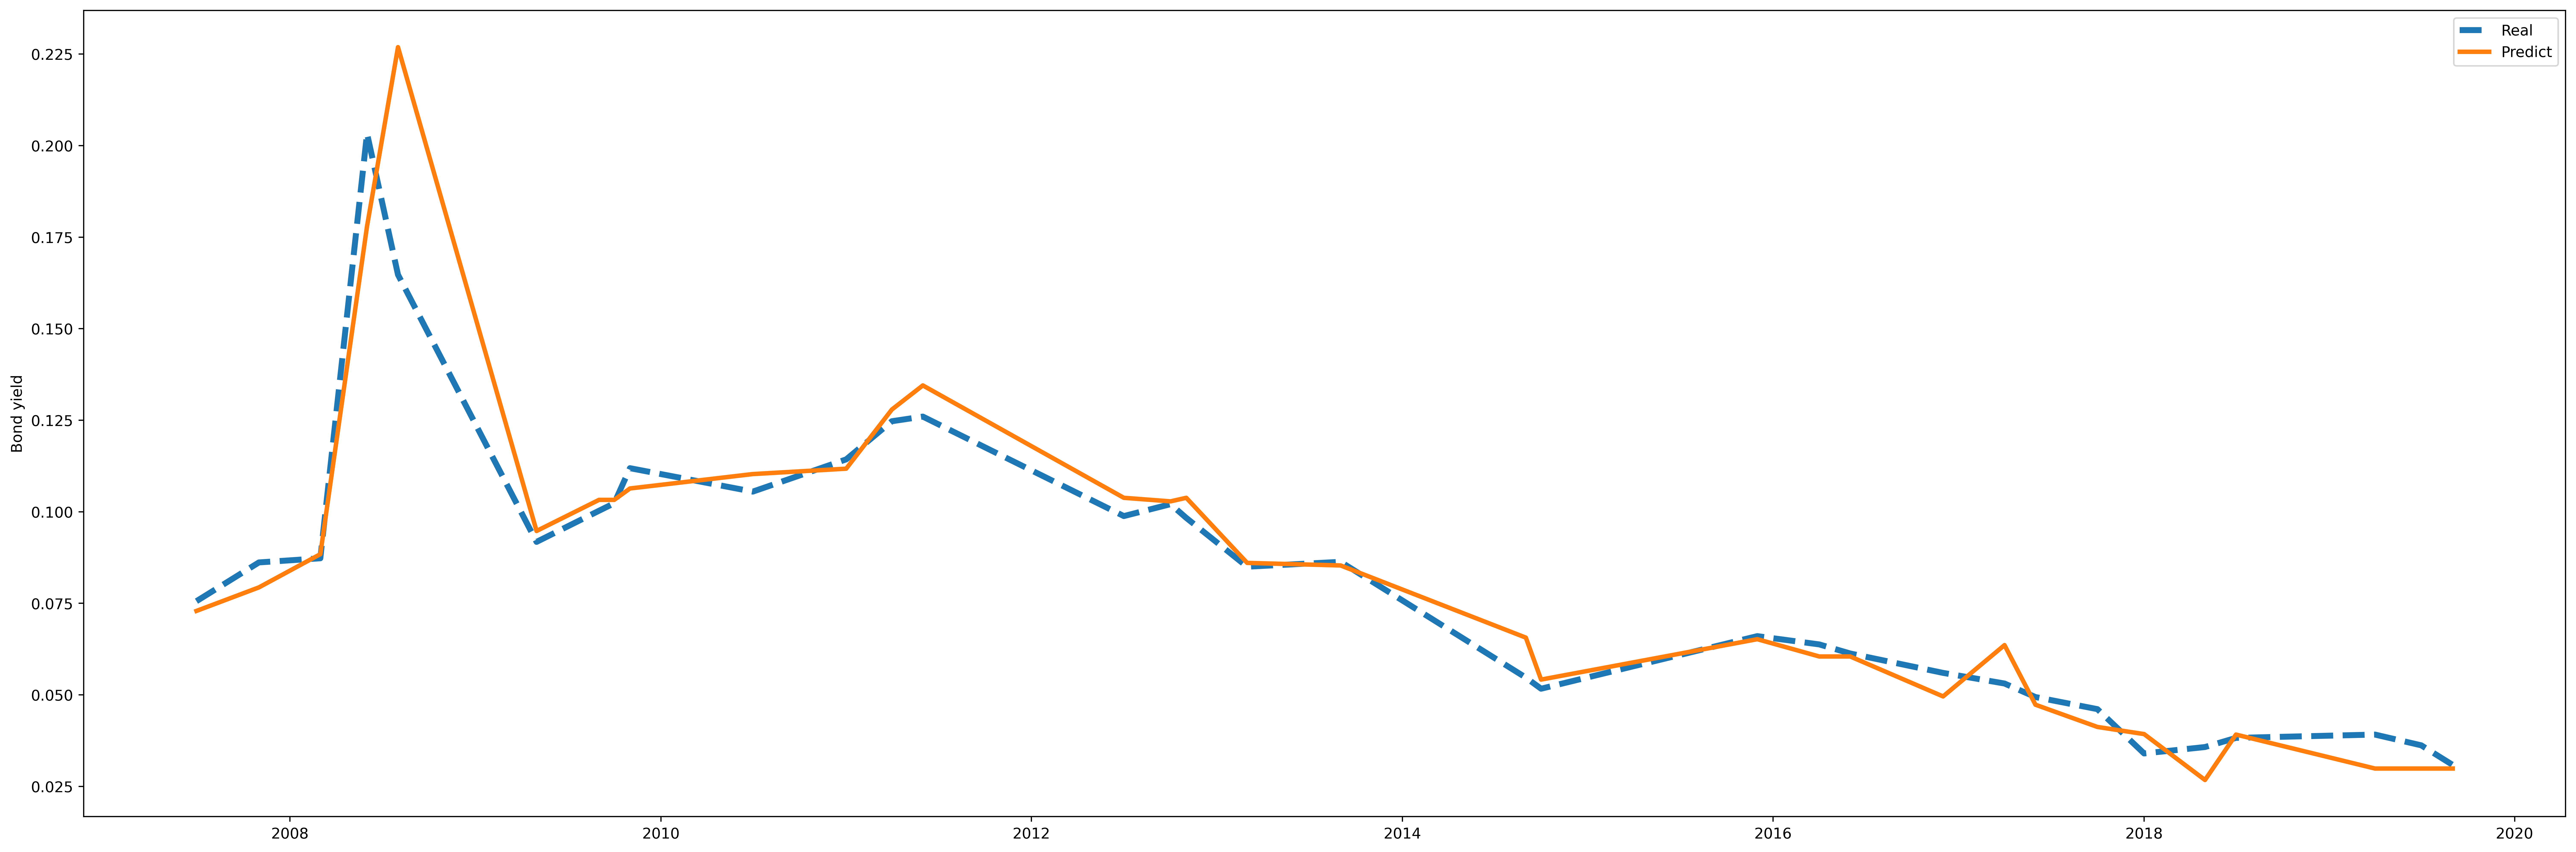

In [37]:
plt.figure(figsize=(30,10))

plt.plot(result_decision_tree.Real,'--',linewidth= 4)
plt.plot(result_decision_tree.Prediction,linewidth= 3)

plt.legend(['Real','Predict'])

plt.ylabel('Bond yield')

plt.show()

In [38]:
rmse = np.sqrt(mean_squared_error(result_decision_tree.Real, result_decision_tree.Prediction))
mae = mean_absolute_error(result_decision_tree.Real, result_decision_tree.Prediction)
mape = (mean_absolute_percentage_error(result_decision_tree.Real, result_decision_tree.Prediction))*100

In [39]:
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.012710536915448042
MAE  = 0.006570727235544568
MAPE = 8.21%


# Random Forest Regressor

In [40]:
random_forest = RandomForestRegressor(random_state = n_state)
random_forest.fit(x_train, y_train);

random_forest_pred = random_forest.predict(x_test)
random_forest_pred = sc_y.inverse_transform(random_forest_pred)

<ipython-input-40-f0e340a8c706>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train);


In [41]:
result_random_forest = pd.DataFrame({'Real': y_test_1, 'Prediction': random_forest_pred})
result_random_forest.sort_index(inplace=True)
result_random_forest.head(7)

,Real,Prediction
Time,,
2007-07-01,0.07559,0.072747
2007-11-01,0.08617,0.084058
2008-03-01,0.08730,0.085475
2008-06-01,0.20333,0.189632
2008-08-01,0.16475,0.191698
2009-05-01,0.09178,0.093554
2009-09-01,0.10028,0.100638


In [42]:
result_random_forest.to_excel('Random_forest_5y.xlsx')

In [43]:
plt.figure(figsize=(30,15))

plt.plot(result_random_forest.Real,'--',linewidth= 4)
plt.plot(result_random_forest.Prediction,linewidth= 4)

plt.legend(['Real','Predict'])

plt.xlabel('Year')
plt.ylabel('Bond yield')
plt.show()

In [44]:
rmse = np.sqrt(mean_squared_error(result_random_forest.Real, result_random_forest.Prediction))
mae = mean_absolute_error(result_random_forest.Real, result_random_forest.Prediction)
mape = (mean_absolute_percentage_error(result_random_forest.Real, result_random_forest.Prediction))*100

In [45]:
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')

RMSE = 0.00606783910219548
MAE  = 0.003605826940858282
MAPE = 4.34%
